In [1]:
#MDS
# https://jessicastringham.net/2018/05/20/Multidimensional-Scaling/


In [2]:
import numpy as np
N = 1000
D = 30
K = 2

# rotate and uncenter the data
X = (2 * np.random.rand(D, D)) @ np.random.randn(D, N) + np.arange(D)[:, None]

In [3]:
# Generate data and then shift its center to [0, 1, 2, 3]
uncentered_data = np.random.randn(4, N) + np.arange(4)[:, None]

# build the magical 1/Ns matrix.
averaging_ones = (np.ones((N, N)))/N

# just show the first few rows
print("originally shifted by ",  np.arange(4))
print("averages found\n", (uncentered_data @ averaging_ones)[:, :6])

originally shifted by  [0 1 2 3]
averages found
 [[-0.02427334 -0.02427334 -0.02427334 -0.02427334 -0.02427334 -0.02427334]
 [ 0.98806639  0.98806639  0.98806639  0.98806639  0.98806639  0.98806639]
 [ 2.07849907  2.07849907  2.07849907  2.07849907  2.07849907  2.07849907]
 [ 3.03809854  3.03809854  3.03809854  3.03809854  3.03809854  3.03809854]]


In [4]:
centering_matrix = lambda n: np.identity(n) -(np.ones((n, 1)) @ np.ones((1, n)))/n
centered_X = X @ centering_matrix(N)

In [5]:
# Do singular value decomposition
u, s, vh = np.linalg.svd(centered_X)
# Take the top K eigenvalues (np.linalg.svd orders eigenvalues)
pc_scores_from_X = np.diag(s[:K]) @ vh[:K]

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(X.T)**2

distance_matrix


array([[   0.        , 1448.14596527, 8770.86034382, ..., 3924.09487079,
        3403.26200674, 5344.92793277],
       [1448.14596527,    0.        , 4480.87232279, ..., 1345.25973673,
        1076.90940927, 2123.97332749],
       [8770.86034382, 4480.87232279,    0.        , ..., 1677.46008045,
        2001.97957045, 1240.71190593],
       ...,
       [3924.09487079, 1345.25973673, 1677.46008045, ...,    0.        ,
         320.22669038,  927.61836254],
       [3403.26200674, 1076.90940927, 2001.97957045, ...,  320.22669038,
           0.        ,  912.99779209],
       [5344.92793277, 2123.97332749, 1240.71190593, ...,  927.61836254,
         912.99779209,    0.        ]])

In [7]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix_from_centered = euclidean_distances(centered_X.T)**2
assert np.allclose(distance_matrix, distance_matrix_from_centered)


In [8]:
actual_gram = centered_X.T @ centered_X


In [9]:
uncentered_gram = X.T @ X

centered_gram = centering_matrix(N).T @ uncentered_gram @ centering_matrix(N)

assert np.allclose(actual_gram, centered_gram)

In [10]:
w, v = np.linalg.eig(centered_gram)
pc_score_from_gram_matrix = np.diag(np.sqrt(w[:K])) @ v.T[:K]

In [11]:
gram_from_dist = -(centering_matrix(N) @ distance_matrix @ centering_matrix(N))/2

#assert np.allclose(gram_from_dist, centered_gram)

In [12]:
def MDS(distance_matrix, K):
    # Double checking that the matrix is the right size
    N = distance_matrix.shape[0]
    assert distance_matrix.shape[0] == distance_matrix.shape[1], 'dist should be a square matrix, but it\'s {}x{}'.format(dist.shape)
    
    # Compute the Gram matrix from the distance_matrix
    gram_from_dist = -(centering_matrix(N) @ distance_matrix @ centering_matrix(N))/2

    # Compute the PC scores from Gram matrix
    w, v = np.linalg.eig(gram_from_dist)
    # Double check the eigenvalues are positive. While they will be for 
    # actual distance matrices, this becomes a problem if we extend this
    # to other types of symmetric matrices that may not be positive semi-definite.
    assert np.all(w[:K] > 0)
    proj = np.diag(np.sqrt(w[:K])) @ v.T[:K]
    
    return proj

pc_scores_from_distance_matrix = MDS(distance_matrix, K)

In [13]:
a = pc_scores_from_distance_matrix
 

In [14]:
import pandas as pd 
df = pd.DataFrame(pc_score_from_gram_matrix.real.T)

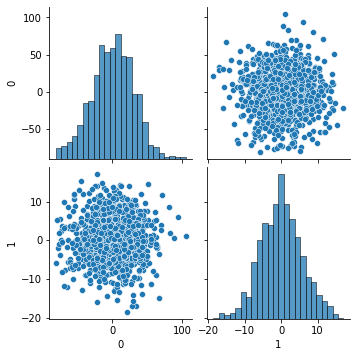

In [15]:
import seaborn as sns
sns.pairplot(df)

(1000, 2)

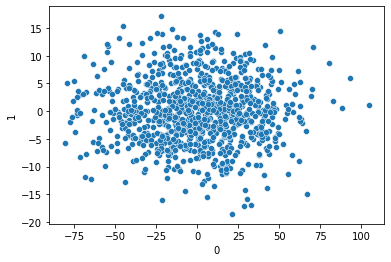

In [16]:
sns.scatterplot(x=df[0], y=df[1])

df.shape